In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv("data/mouse_drug_data.csv")
drug_data = pd.read_csv("data/clinicaltrial_data.csv")

# Combine the data into a single dataset
combine_df =pd.merge(mouse_data, drug_data, on="Mouse ID")

# Display the data table for preview

combine_df.head()
#drug_data
#mouse_data

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint

#tumor = combine_df.loc[combine_df["Drug"] == "Stelasyn"]
#print(tumor)
#tumor_data = tumor_data.groupby(["Drug"]).mean()
#tumor_data = tumor.groupby(["Timepoint"]).mean()
#tumorVOL_df = pd.DataFrame(tumor_data)


tumor_data = combine_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].mean()
tumorVOL_df = pd.DataFrame(tumor_data)
tumorVOL_df = tumorVOL_df.reset_index()
mean_pivot = tumorVOL_df.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]


uniques = tumorVOL_df["Drug"].unique()
print(uniques)
#tumorVOL_df
mean_pivot

['Capomulin' 'Ceftamin' 'Infubinol' 'Ketapril' 'Naftisol' 'Placebo'
 'Propriva' 'Ramicane' 'Stelasyn' 'Zoniferol']


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


NameError: name 'errorDF' is not defined

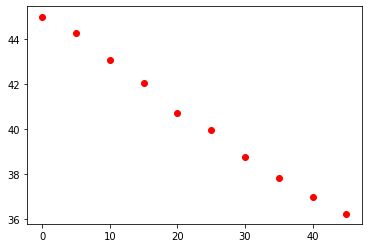

In [18]:
colors = ["red", "yellow", "blue", "green", "orange", "black", "cyan", "purple", "grey", "brown"]
alpha_list = ["1", "0", "1", "1", "0", "1", "0", "0", "0", "0"]
dfList = []
count = 0
for drug in uniques:
    newDf = tumorVOL_df.loc[tumorVOL_df["Drug"]==drug]
    dfList.append(newDf)
    
#print(dfList)

for df in dfList:
    plt.scatter(dfList[count]["Timepoint"], dfList[count]["Tumor Volume (mm3)"], color=colors[count], 
                alpha=alpha_list[count])
    count +=1


#capDF = tumorVOL_df.loc[tumorVOL_df["Drug"]=="Capomulin"]
#print(capDF)

plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.title("Tumor Volume Over Time")
plt.show()

#plt.scatter(DFList[0:]["Timepoint"], capDF["Tumor Volume (mm3)"], color=colors[0:])
#plt.scatter(DFList[1]["Timepoint"], capDF["Tumor Volume (mm3)"], color=colors[1])

In [4]:
#scatter plot that shows how the tumor volume changes over time for each treatment.

#plt.scatter(tumorVol_df("Tumor Volume (mm3)")

In [5]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

# Convert to DataFrame

# Preview DataFrame



In [6]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [7]:
# Generate the Plot (with Error Bars)

# Save the Figure



In [8]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [9]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [10]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [11]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [12]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [13]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [14]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [15]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [16]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [17]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
#fig.show()

![Metastatic Spread During Treatment](../Images/change.png)